In [ ]:
#loading images into a numpy array
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import glob
X_data = []
files = glob.glob("C:/Users/sujjw/AI/Final_Combine/*.jpg")
for myfile in files:
    image = Image.open(myfile)
    data = asarray(image)
    X_data.append(data)
X_img = np.array(X_data)
plt.imshow(X_img[1])
print("X_data size : " + str(X_img.shape))

(800, 576, 768, 3)


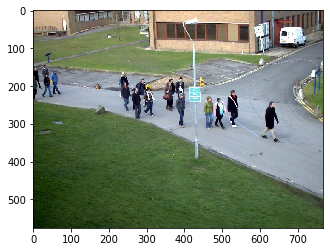

In [26]:
#splitting data for training and testing
train_set_X = X_img[:800]
test_set_X = X_img[800:]
plt.imshow(train_set_X[500])
print(train_set_X.shape)

In [37]:
train_num = train_set_X.shape[0]
total_pixels = train_set_X.shape[1] * train_set_X.shape[2] * train_set_X.shape[3];
print("number of training examples = " + str(train_num))
print("resolution of images = " + str(train_set_X.shape[1]) + " * " + str(train_set_X.shape[2]) + " * " + str(train_set_X.shape[3]))
print("Total pixels = " + str(total_pixels))
train_set_X_flatten = train_set_X.reshape(train_num, total_pixels)
train_set_X_flatten = train_set_X_flatten.T
print(train_set_X_flatten.shape)

number of training examples = 800
resolution of images = 576 * 768 * 3
Total pixels = 1327104
(1327104, 800)


In [ ]:
from keras.models import sequential
from keras.layers import dense
model = keras.layers.dense([train_set_X_flatten[0], activation = tf.nn.relu, input_shape = (train_set_X_flatten[0],),
                           keras.layers.dense(1)
                           ])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mean_squared_error',
             optimizer = optimizer,
             metrics = ['mean_absolute_error', 'mean_squared_error'])
model.fit(train_set_X_flatten)